# Comparative Analysis
In this notebook, we compare ClaP with competitors.

In [27]:
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [28]:
import numpy as np
import pandas as pd

pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns

from aeon.benchmarking import plot_critical_difference
from external.MCM import MCM
from wand.image import Image

sns.set_theme()
sns.set_color_codes()

import os
import sys

sys.path.append("../../")

Let's choose a score for evaluation (AMI).

In [29]:
eval_score = "ami_score"

Let's load the scores from the different methods.

In [30]:
c1 = ["KShape", "GAK", "Time2Feat", "Agglomerative", "Spectral"]
c2 = ["AutoPlait", "CLaP", "GGS", "HDP-HSMM", "TICC", "Time2State", "ClaSP2Feat"]

datasets = ["TSSB", "UTSA", "HAS"] #
methods, dfs = list(), list()

for candidate_name in c1:
    methods.append((candidate_name, "clustering", f"{candidate_name}.csv.gz"))
    
for candidate_name in c2:
    methods.append((candidate_name, "state_detection", f"{candidate_name}.csv.gz"))

for idx, (name, comp_type, file_name) in enumerate(methods):
    df = []
    
    for d in datasets:
        df.append(pd.read_csv(f"../../experiments/{comp_type}/{d}_{file_name}", compression="gzip")) # usecols=["dataset", eval_score],
    
    df = pd.concat(df)
    df.sort_values(by="dataset", inplace=True)
    dfs.append((name, df))

df_scores = pd.DataFrame()

for name, df in dfs:
    df_scores["dataset"] = df.dataset
    
    try:
        df_scores[name] = df[eval_score]
    except:
        df_scores[name] = df["ami"]

df_scores.reset_index(drop=True, inplace=True)
df_scores

,dataset,KShape,GAK,Time2Feat,Agglomerative,Spectral,AutoPlait,CLaP,GGS,HDP-HSMM,TICC,Time2State,ClaSP2Feat
0,Adiac,0.001,-0.002,0.001,-0.001,-0.002,0.000,0.944,0.000,0.410,0.000,0.044,0.737
1,ArrowHead,0.047,0.000,0.013,-0.000,-0.000,0.000,0.945,0.000,0.002,0.024,0.459,0.000
2,Beef,0.087,0.171,0.001,0.002,-0.001,0.060,0.910,0.000,0.023,0.027,0.459,0.000
3,BeetleFly,0.008,0.005,0.006,0.010,0.014,0.000,0.915,0.000,0.004,0.014,0.332,0.000
4,BirdChicken,0.003,0.008,0.020,0.002,0.003,0.000,0.973,0.000,0.011,0.014,0.475,0.000
5,CBF,0.238,0.056,0.012,0.004,0.025,0.000,0.951,0.000,0.541,0.058,0.461,0.951
6,Cane,0.591,0.019,0.039,0.236,0.039,0.000,0.589,0.000,0.060,0.002,0.266,0.482
7,Car,0.013,0.011,0.004,0.001,0.000,0.000,0.796,0.000,0.279,0.050,0.612,0.000
8,Chinatown,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
9,ChlorineConcentration,0.000,0.000,-0.000,-0.000,-0.000,0.000,0.000,0.001,0.036,0.003,0.117,0.000


Let's calculate the mean/median/std score.

In [31]:
df_scores.iloc[:,1:].mean(axis=0).sort_values(ascending=False).round(3)

CLaP             0.641
ClaSP2Feat       0.441
Agglomerative    0.425
Time2State       0.422
HDP-HSMM         0.408
Time2Feat        0.368
GGS              0.345
Spectral         0.308
TICC             0.202
AutoPlait        0.184
KShape           0.179
GAK              0.161
dtype: float64

In [32]:
df_scores.iloc[:,1:].median(axis=0).sort_values(ascending=False).round(3)

CLaP             0.735
Time2State       0.459
ClaSP2Feat       0.453
HDP-HSMM         0.434
Agglomerative    0.371
Time2Feat        0.278
GGS              0.243
Spectral         0.131
KShape           0.039
GAK              0.031
TICC             0.024
AutoPlait        0.000
dtype: float64

In [33]:
df_scores.iloc[:,1:].std(axis=0).sort_values().round(3)

HDP-HSMM         0.283
Time2State       0.289
GAK              0.301
KShape           0.310
CLaP             0.326
Spectral         0.337
TICC             0.345
AutoPlait        0.345
Agglomerative    0.350
GGS              0.366
Time2Feat        0.366
ClaSP2Feat       0.398
dtype: float64

Let's compute the wins per method.

In [34]:
ranks = df_scores.iloc[:,1:].rank(1, method='min', ascending=False)
means = np.array(ranks.mean(axis=0))
args = np.argsort(means)

In [35]:
for mean, name in zip(means[args], df_scores.columns[1:].to_numpy()[args]):
    print(f"{name}:wins={ranks[ranks[name] == 1].shape[0]} rank={np.round(mean, 1)}")

CLaP:wins=183 rank=2.7
Time2State:wins=38 rank=4.5
HDP-HSMM:wins=39 rank=4.6
ClaSP2Feat:wins=97 rank=4.9
Agglomerative:wins=57 rank=5.0
Time2Feat:wins=58 rank=5.3
Spectral:wins=56 rank=6.1
GGS:wins=54 rank=6.1
TICC:wins=48 rank=6.8
KShape:wins=40 rank=7.0
GAK:wins=37 rank=7.4
AutoPlait:wins=45 rank=7.9


Let's plot the CD diagram.

/var/folders/1m/8xt9fm8d1575s4p3vrgccf7r0000gn/T/ipykernel_2497/1137986766.py:9: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig("../../figures/cd_clustering_comparative_combined.pdf", bbox_inches="tight")
/Users/ermshaua/miniconda3/envs/clap/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


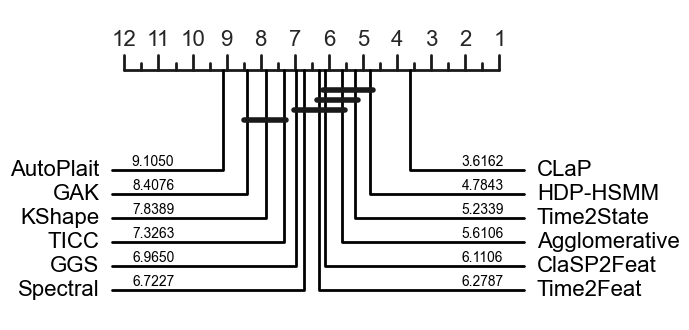

In [36]:
ax = plot_critical_difference(
    scores=df_scores.iloc[:, 1:].to_numpy(),
    labels=df_scores.columns[1:].to_numpy(),
    errors=False,
    clique_method="holm",
    alpha=0.05,
)

plt.savefig("../../figures/cd_clustering_comparative_combined.pdf", bbox_inches="tight")

Let's plot the MCM.

Processing ClaSP2Feat, Time2State:   0%|          | 0/12 [00:00<?, ?it/s]   


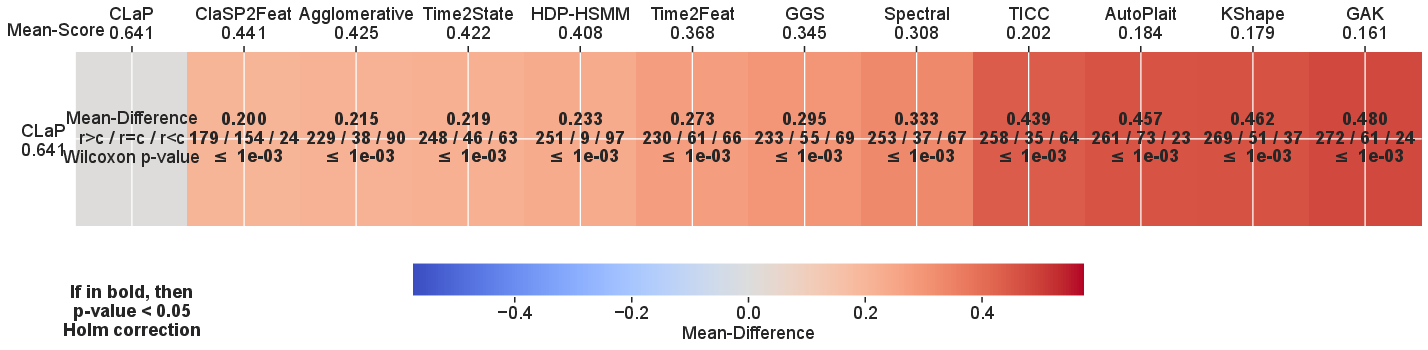

In [37]:
dir_path = "../../figures/"
file_name = "mcm_clustering_comparative_combined"

MCM.compare(
    output_dir=dir_path,
    used_statistic="Score",
    save_as_json=False,
    df_results=df_scores.iloc[:, 1:],
    pdf_savename=file_name,
    load_analysis=False,
    pvalue_correction="Holm",
    row_comparates=("CLaP",),
    fig_size=(20,5),
    font_size=18,
    precision=3
)
Image(filename=os.path.join(dir_path, file_name + ".pdf"))

Let's compute wins/losses against ClaSP.

In [38]:
selection = "CLaP"

for rival in df_scores.columns[1:]:
    if rival == selection: continue

    df_pair = df_scores[[selection, rival]]
    pair_ranks = df_pair.rank(1, method='min', ascending=False)

    wins = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 2)].shape[0]
    losses = pair_ranks[(pair_ranks[selection] == 2) & (pair_ranks[rival] == 1)].shape[0]
    ties = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 1)].shape[0]

    assert wins + losses + ties == pair_ranks.shape[0]

    print(f"{selection} vs {rival}: (wins/ties/losses): {wins}/{ties}/{losses}")

CLaP vs KShape: (wins/ties/losses): 269/51/37
CLaP vs GAK: (wins/ties/losses): 272/61/24
CLaP vs Time2Feat: (wins/ties/losses): 230/61/66
CLaP vs Agglomerative: (wins/ties/losses): 229/38/90
CLaP vs Spectral: (wins/ties/losses): 253/37/67
CLaP vs AutoPlait: (wins/ties/losses): 261/73/23
CLaP vs GGS: (wins/ties/losses): 233/55/69
CLaP vs HDP-HSMM: (wins/ties/losses): 251/9/97
CLaP vs TICC: (wins/ties/losses): 258/35/64
CLaP vs Time2State: (wins/ties/losses): 248/46/63
CLaP vs ClaSP2Feat: (wins/ties/losses): 179/154/24


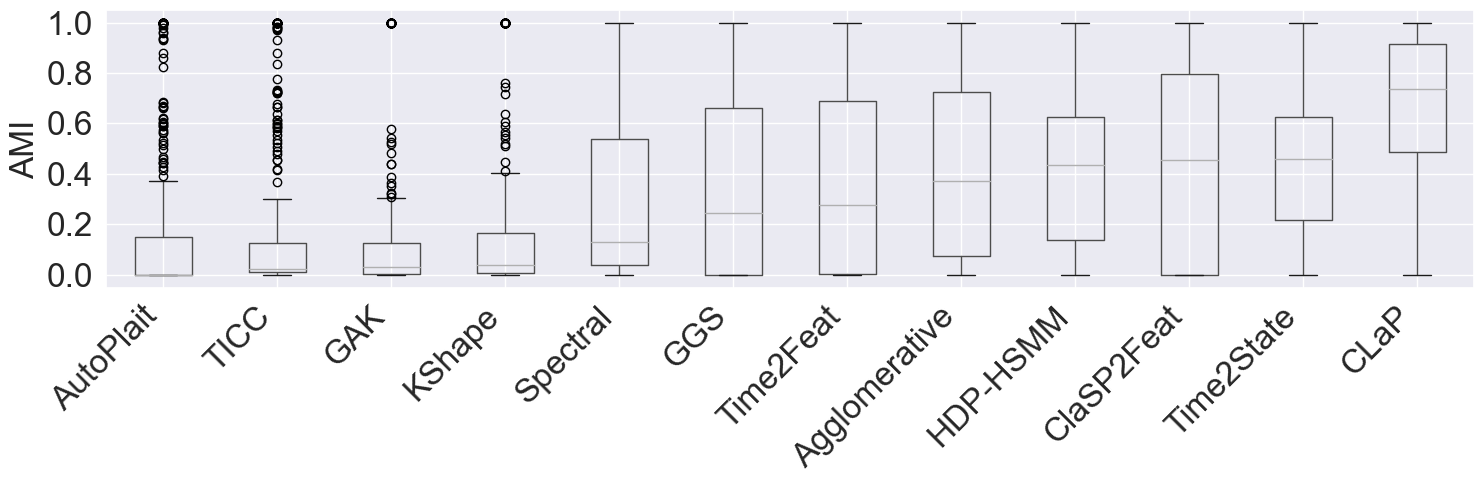

In [39]:
fontsize = 24
_, ax = plt.subplots(figsize=(15, 5))

# sort by median performance
df_sorted_scores = df_scores[df_scores.iloc[:, 1:].median(axis=0).sort_values().index]

df_sorted_scores.boxplot(ax=ax, rot=90)
ax.set_ylabel("AMI", fontsize=fontsize)

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)

ax.set_xticklabels(df_sorted_scores.columns, rotation=45, ha="right")
ax.set_yticks(np.round(np.arange(0, 1.0 + .2, .2), 1))

plt.savefig(f"../../figures/bp_clustering_comparative_combined.pdf", bbox_inches="tight")